In [1]:
import pandas as pd
import datetime

In [2]:
def json_to_games_df(json_dict):
    game_info = []
    for game in json_dict:
        show_id = game
        for key in json_dict[game]:
            date = json_dict[game]["Date"]
            players = json_dict[game]["Players"]
            results = json_dict[game]["results"]


        game_info.append({"Show_IDs": show_id, "Date": date, "Players" : players, "Results" : results})
    
    return pd.DataFrame(game_info)    
    

In [3]:

def json_to_clues_df(json_dict):
    

    all_clues = []
    for game in json_dict:
        show_id = game
        for clue in json_dict[game]['jeopardy_round']:

            clue_text = clue['clue_text']
            clue_answer = clue['clue_answer']
            clue_answerer = clue['clue_answerer']
            clue_value = clue['clue_value']

            try:
                answerer_correct = clue['Answerer Correct?']
            except:
                answerer_correct = None

            try: 
                category = clue['category']
            except:
                category = None

            try:
                clue_id = clue['clue_id'] 
            except:
                clue_id = None

            all_clues.append({"show_id": show_id, "round" : 'jeopardy_round', 'category': category, "clue_id": clue_id, "clue_text": clue_text, "answerer": clue_answerer, 'clue_value' : clue_value, 'clue_answer': clue_answer})

        for clue in json_dict[game]['double_jeopardy_round']:
            clue_text = clue['clue_text']
            clue_answer = clue['clue_answer']
            clue_answerer = clue['clue_answerer']
            clue_value = clue['clue_value']

            try:
                answerer_correct = clue['Answerer Correct?']
            except:
                answerer_correct = None

            try: 
                category = clue['category']
            except:
                category = None

            try:
                clue_id = clue['clue_id'] 
            except:
                clue_id = None

            all_clues.append({"show_id": show_id, "round" : 'double_jeopardy_round', 'category': category, "clue_id": clue_id, "clue_text": clue_text, "answerer": clue_answerer, 'clue_value' : clue_value, 'clue_answer': clue_answer })  

    return pd.DataFrame(all_clues)
        
        
        

        
            

In [4]:
def get_datetime_obj(date_string):
    return datetime.datetime.strptime(date_string, '%A, %B %d, %Y')

In [5]:
import json
with open("all_games.txt", "r") as read_file:
    all_games_json = json.load(read_file)

In [6]:
clues_df = json_to_clues_df(all_games_json)
clues_df

,answerer,category,clue_answer,clue_id,clue_text,clue_value,round,show_id
0,J.D.,THE OLD TESTAMENT,sheep,clue_J_1_1_stuck,"Let's all flock to read Psalm 95, in which hum...",$200,jeopardy_round,Show #4596
1,J.D.,SEAN SONG,Sean Combs,clue_J_2_1_stuck,"The rap on him is he's sometimes ""Puffy""",$200,jeopardy_round,Show #4596
2,J.D.,CITY WALK,Los Angeles,clue_J_3_1_stuck,In the 1980s this city passed Chicago as the U...,$200,jeopardy_round,Show #4596
3,Ken,SLOGANEERING,Chicken of the Sea,clue_J_4_1_stuck,"""Ask any mermaid you happen to see, 'What's th...",$200,jeopardy_round,Show #4596
4,Ken,ROOM,magazines,clue_J_5_1_stuck,"Many people have become familiar with ""Shape"",...",$200,jeopardy_round,Show #4596
5,Ken,"""BOARD""",the Disney Board of Directors,clue_J_6_1_stuck,"In 2003, Roy E. Disney left it after being on ...",$200,jeopardy_round,Show #4596
6,Ken,THE OLD TESTAMENT,Adam,clue_J_1_2_stuck,Some say the screech owl in the King James Bib...,$400,jeopardy_round,Show #4596
7,Ken,SEAN SONG,Sean Penn,clue_J_2_2_stuck,Once married to Madonna,$400,jeopardy_round,Show #4596
8,Ken,CITY WALK,Greenwich,clue_J_3_2_stuck,"This London borough is the G in GMT, squire",$400,jeopardy_round,Show #4596
9,Ken,SLOGANEERING,Carl\'s Jr.,clue_J_4_2_stuck,"A fast food chain: ""If it doesn't get all over...",$400,jeopardy_round,Show #4596


In [7]:
games_df = json_to_games_df(all_games_json )
games_df['datetime'] = list(map(lambda x: get_datetime_obj(x),games_df['Date']))
games_df


,Date,Players,Results,Show_IDs,datetime
0,"Monday, September 6, 2004","[J.D. Smith, Betsey Casman, Ken Jennings]","{'Ken': ['$4,800', '$13,800', '$31,600', '$10,...",Show #4596,2004-09-06
1,"Tuesday, September 7, 2004","[Rich Hartz, Bob Watts, Ken Jennings]",None,Show #4597,2004-09-07
2,"Wednesday, September 8, 2004","[Laura Gustafson, Adam Meyer, Ken Jennings]","{'Ken': ['$7,200', '$16,400', '$33,600', '$27,...",Show #4598,2004-09-08
3,"Thursday, September 9, 2004","[Todd Perkins, Amy Helmes, Ken Jennings]","{'Ken': ['$4,800', '$8,100', '$28,400', '$21,8...",Show #4599,2004-09-09
4,"Friday, September 10, 2004","[Bill Scheller, Kollin Min, Ken Jennings]","{'Ken': ['$5,800', '$13,600', '$28,600', '$30,...",Show #4600,2004-09-10
5,"Monday, September 13, 2004","[Bruce England, Dana Dolan, Ken Jennings]",None,Show #4601,2004-09-13
6,"Tuesday, September 14, 2004","[Robert Quinn, Kate Duffy, Ken Jennings]","{'Ken': ['$5,000', '$11,200', '$31,000', '$40,...",Show #4602,2004-09-14
7,"Wednesday, September 15, 2004","[David Fishbach, Cara Butler, Ken Jennings]","{'Ken': ['$6,000', '$11,400', '$43,800', '$37,...",Show #4603,2004-09-15
8,"Thursday, September 16, 2004","[Elaine Skopelja, John Cook, Ken Jennings]",None,Show #4604,2004-09-16
9,"Friday, September 17, 2004","[Greg Taylor, Marilyn Werner, Ken Jennings]",None,Show #4605,2004-09-17


In [11]:
import re
strng = "DD: $100"
strng = re.sub( '[$:D ]', '',strng)
int(strng)



def strng_to_value(strng):
    if strng != None and strng != ' ':
        temp = re.sub( '[,$:D ]', '', f'{strng}')
        if temp == '':
            val = None
        else:
            val = int(temp)
    else:
        val = None
    return val
        
#int(re.sub( '[,$:D ]', '', f'{strng}')) if strng is not None else False  
    

strclue_values = [strng_to_value(strng) for strng in clues_df['clue_value']]
is_daily_double = [bool(re.search('[D]', f'{clue_value}')) for clue_value in clues_df['clue_value']]
int_values = [int(strng) if strng != None else None for strng in strclue_values]

In [12]:
clues_df['int_values'] = int_values
clues_df['is_daily_double'] = is_daily_double
clues_df

,answerer,category,clue_answer,clue_id,clue_text,clue_value,round,show_id,int_values,is_daily_double
0,J.D.,THE OLD TESTAMENT,sheep,clue_J_1_1_stuck,"Let's all flock to read Psalm 95, in which hum...",$200,jeopardy_round,Show #4596,200.0,False
1,J.D.,SEAN SONG,Sean Combs,clue_J_2_1_stuck,"The rap on him is he's sometimes ""Puffy""",$200,jeopardy_round,Show #4596,200.0,False
2,J.D.,CITY WALK,Los Angeles,clue_J_3_1_stuck,In the 1980s this city passed Chicago as the U...,$200,jeopardy_round,Show #4596,200.0,False
3,Ken,SLOGANEERING,Chicken of the Sea,clue_J_4_1_stuck,"""Ask any mermaid you happen to see, 'What's th...",$200,jeopardy_round,Show #4596,200.0,False
4,Ken,ROOM,magazines,clue_J_5_1_stuck,"Many people have become familiar with ""Shape"",...",$200,jeopardy_round,Show #4596,200.0,False
5,Ken,"""BOARD""",the Disney Board of Directors,clue_J_6_1_stuck,"In 2003, Roy E. Disney left it after being on ...",$200,jeopardy_round,Show #4596,200.0,False
6,Ken,THE OLD TESTAMENT,Adam,clue_J_1_2_stuck,Some say the screech owl in the King James Bib...,$400,jeopardy_round,Show #4596,400.0,False
7,Ken,SEAN SONG,Sean Penn,clue_J_2_2_stuck,Once married to Madonna,$400,jeopardy_round,Show #4596,400.0,False
8,Ken,CITY WALK,Greenwich,clue_J_3_2_stuck,"This London borough is the G in GMT, squire",$400,jeopardy_round,Show #4596,400.0,False
9,Ken,SLOGANEERING,Carl\'s Jr.,clue_J_4_2_stuck,"A fast food chain: ""If it doesn't get all over...",$400,jeopardy_round,Show #4596,400.0,False


Triple stumper by season, 

In [10]:
from collections import Counter

cat_cnt_j = Counter()
cat_cnt_dj = Counter()
cat_cnt_all = Counter()


for index, row in clues_df.iterrows():
    f = row[0]
    
    category = row['category']
    
    cat_cnt_all[category] += 1
    
    if row["round"] == 'jeopardy_round':
        cat_cnt_j[category] += 1
    
    if row["round"] == 'double_jeopardy_round':
        cat_cnt_dj[category] += 1
        
        
# or index, row in df.iterrows():
#     print(row['c1'], row['c2'])



In [11]:
all_categories, all_counts = zip(*cat_cnt_all.most_common(21))

In [12]:
j_categories, j_counts = zip(*cat_cnt_j.most_common(21))

In [13]:
dj_categories, dj_counts = zip(*cat_cnt_dj.most_common(21))

In [14]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'Category Counts for All Games')

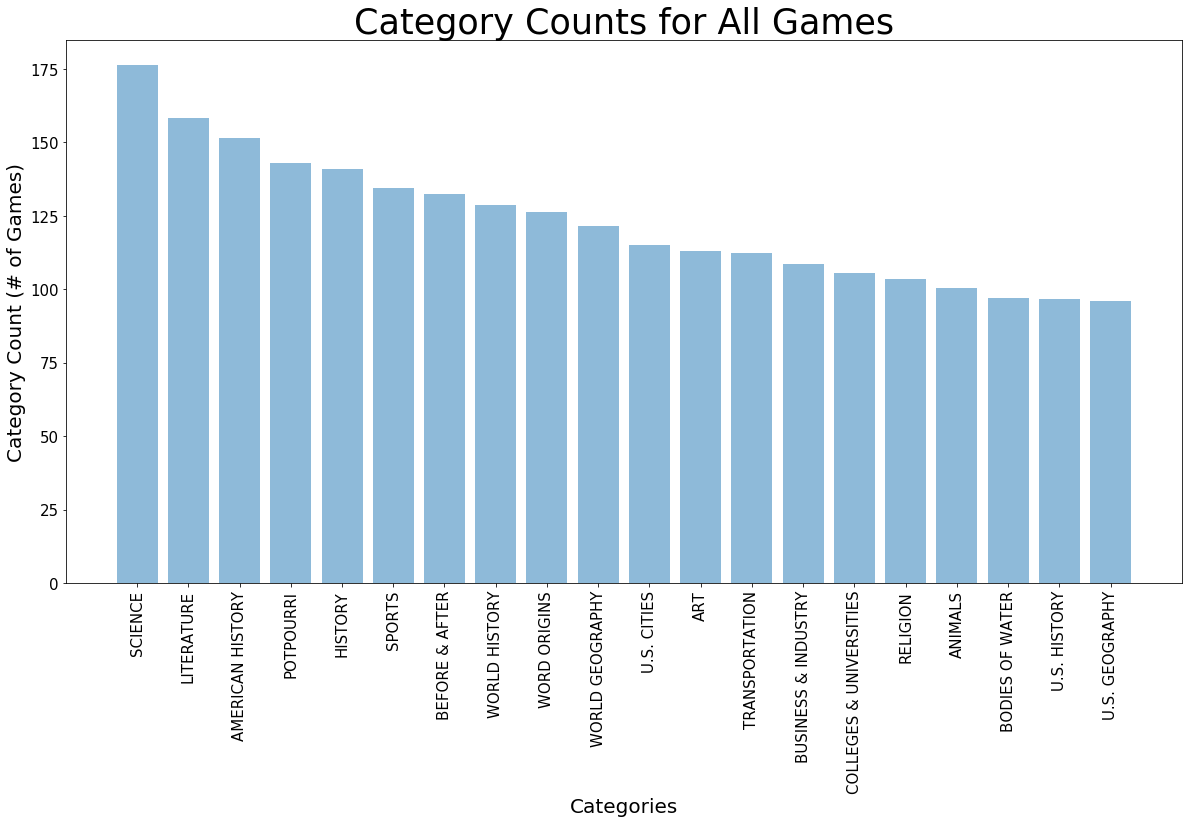

In [124]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(all_categories[1:21])),[count/5 for count in all_counts[1:21]],align="center",alpha=0.5)
plt.yticks(fontsize = 15)
plt.xticks(np.arange(len(all_categories[1:21])),all_categories[1:21],rotation = 90, fontsize = 15)
plt.ylabel("Category Count (# of Games)", fontsize = 20)
plt.xlabel("Categories", fontsize = 20)
plt.title("Category Counts for All Games", fontsize = 35)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

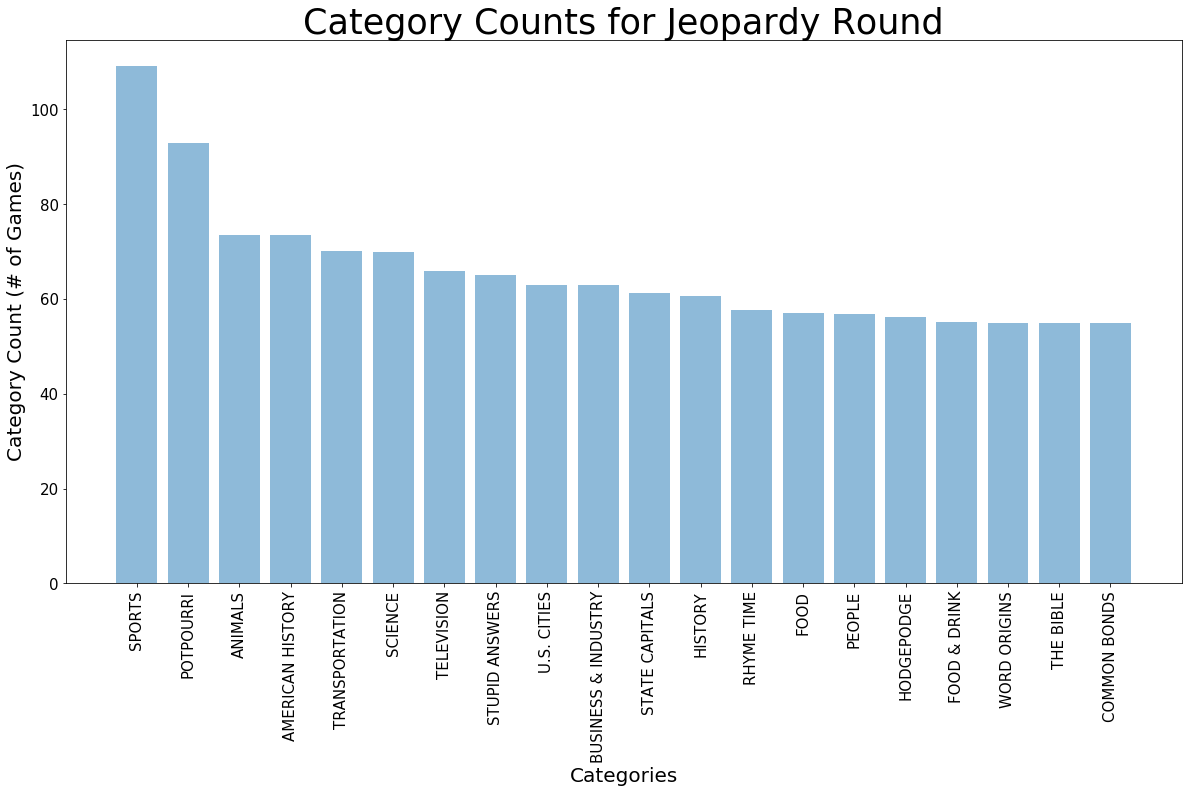

In [125]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(j_categories[1:21])),[count/5 for count in j_counts[1:21]],align="center",alpha=0.5)
plt.xticks(np.arange(len(j_categories[1:21])),j_categories[1:21],rotation = 90, fontsize = 15)
plt.ylabel("Category Count (# of Games)", fontsize = 20)
plt.xlabel("Categories", fontsize = 20)
plt.title("Category Counts for Jeopardy Round", fontsize = 35)
plt.yticks(fontsize = 15)

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140.]),
 <a list of 8 Text yticklabel objects>)

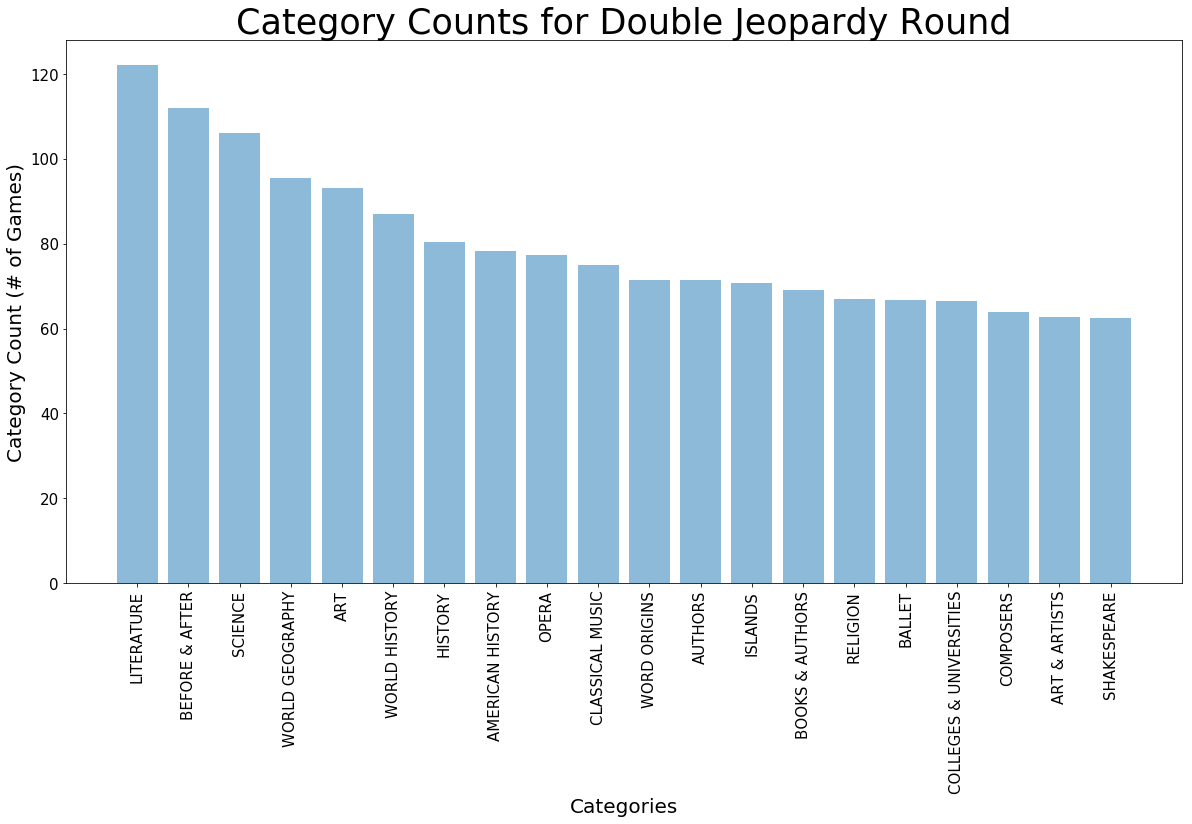

In [126]:
plt.figure(figsize=(20,10))
plt.bar(np.arange(len(dj_categories[1:21])),[count/5 for count in dj_counts[1:21]],align="center",alpha=0.5)
plt.xticks(np.arange(len(dj_categories[1:21])),dj_categories[1:21],rotation = 90, fontsize = 15)
plt.ylabel("Category Count (# of Games)", fontsize = 20)
plt.xlabel("Categories", fontsize = 20)
plt.title("Category Counts for Double Jeopardy Round", fontsize = 35)
plt.yticks(fontsize = 15)

In [60]:
games_df['Show_IDs']

0       Show #4596
1       Show #4597
2       Show #4598
3       Show #4599
4       Show #4600
5       Show #4601
6       Show #4602
7       Show #4603
8       Show #4604
9       Show #4605
10      Show #4606
11      Show #4607
12      Show #4608
13      Show #4609
14      Show #4610
15      Show #4611
16      Show #4612
17      Show #4613
18      Show #4614
19      Show #4615
20      Show #4616
21      Show #4617
22      Show #4618
23      Show #4619
24      Show #4620
25      Show #4621
26      Show #4622
27      Show #4623
28      Show #4624
29      Show #4625
           ...    
6126    Show #7901
6127    Show #7902
6128    Show #7903
6129    Show #7904
6130    Show #7905
6131    Show #7906
6132    Show #7907
6133    Show #7908
6134    Show #7909
6135    Show #7910
6136    Show #7911
6137    Show #7912
6138    Show #7913
6139    Show #7914
6140    Show #7915
6141    Show #7916
6142    Show #7917
6143    Show #7918
6144    Show #7919
6145    Show #7920
6146    Show #2372
6147    Show

Season35 2018-09-10 to 2019-07-26	(112 games archived)	
Season 34	2017-09-11 to 2018-07-27	(230 games archived)	
Season 33	2016-09-12 to 2017-07-28	(230 games archived)	
Season 32	2015-09-14 to 2016-07-29	(230 games archived)	
Season 31	2014-09-15 to 2015-07-31	(230 games archived)	
Season 30	2013-09-16 to 2014-08-01	(230 games archived)	
Season 29	2012-09-17 to 2013-08-02	(230 games archived)	
Season 28	2011-09-19 to 2012-08-03	(230 games archived)	
Season 27	2010-09-13 to 2011-07-29	(230 games archived)	
Season 26	2009-09-14 to 2010-07-30	(230 games archived)	
Season 25	2008-09-08 to 2009-07-24	(230 games archived)	
Season 24	2007-09-10 to 2008-07-25	(230 games archived)	
Season 23	2006-09-11 to 2007-07-27	(230 games archived)	
Season 22	2005-09-12 to 2006-07-28	(230 games archived)	
Season 21	2004-09-06 to 2005-07-22	(230 games archived)	
Season 20	2003-09-08 to 2004-07-23	(230 games archived)	
Season 19	2002-09-02 to 2003-07-18	(228 games archived)	
Season 18	2001-09-03 to 2002-07-19	(229 games archived)	
Season 17	2000-09-04 to 2001-07-20	(230 games archived)	
Season 16	1999-09-06 to 2000-07-21	(230 games archived)	
Season 15	1998-09-07 to 1999-07-23	(228 games archived)	
Season 14	1997-09-01 to 1998-07-17	(229 games archived)	
Season 13	1996-09-02 to 1997-07-18	(208 games archived)	
Season 12	1995-09-04 to 1996-07-19	(105 games archived)	
Season 11	1994-09-05 to 1995-07-21	(51 games archived)	
Season 10	1993-09-06 to 1994-07-22	(54 games archived)	
Season 9	1992-09-07 to 1993-07-23	(76 games archived)	
Season 8	1991-09-02 to 1992-07-17	(68 games archived)	
Season 7	1990-09-03 to 1991-07-19	(60 games archived)	
Super Jeopardy!	1990-06-16 to 1990-09-08	(13 games archived)
Season 6	1989-09-04 to 1990-07-20	(152 games archived)	
Season 5	1988-09-05 to 1989-07-21	(132 games archived)	
Season 4	1987-09-07 to 1988-07-22	(150 games archived)	
Season 3	1986-09-08 to 1987-07-24	(111 games archived)	
Season 2	1985-09-09 to 1986-06-06	(57 games archived)	
Season 1	1984-09-10 to 1985-06-07	(42 games archived)	

In [31]:
def dt(y,m,d):
    return datetime.datetime(y,m,d,0,0)



def check_season(date):
    
        
    super_jeop = [dt(1990,9,8), dt(1990,9,1), dt(1990,8,25), dt(1990,8,18), dt(1990,8,11), dt(1990,8,4),dt(1990,7,28),dt(1990,7,21), dt(1990,7,14), dt(1990,7,7),dt(1990,6,30),dt(1990,6,23), dt(1990,6,16) ]
    trebek_pilots = [dt(1983,9,18),dt(1984,1,1)]



    
    if date in super_jeop:
        return 'super_jeopardy'
    elif date in trebek_pilots:
        return 'Pilot'
    if date <= datetime.datetime(1985,6,7,0,0):
        return 1
    elif date <= datetime.datetime(1986,6,6,0,0):
        return 2
    elif date <= datetime.datetime(1987,7,24,0,0):
        return 3
    elif date <= datetime.datetime(1988,7,22,0,0):
        return 4
    elif date <= datetime.datetime(1989, 7, 21,0,0):
        return 5
    elif date <= dt(1990, 7, 20):
        return 6
    elif date <= dt(1991, 7, 19):
        return 7
    elif date <= dt(1992, 7, 17):
        return 8
    elif date <= dt(1993, 7, 23):
        return 9
    elif date <= dt(1994, 7, 22):
        return 10
    elif date <= dt(1995, 7, 21):
        return 11
    elif date <= dt(1996, 7, 19):
        return 12
    elif date <= dt(1997, 7, 18):
        return 13
    elif date <= dt(1998, 7, 17):
        return 14
    elif date <= dt(1999, 7, 23):
        return 15
    elif date <= dt(2000, 7, 21):
        return 16
    elif date <= dt(2001, 7, 20):
        return 17
    elif date <= dt(2002, 7, 19):
        return 18
    elif date <= dt(2003, 7, 18):
        return 19
    elif date <= dt(2004, 7, 23):
        return 20
    elif date <= dt(2005, 7, 22):
        return 21
    elif date <= dt(2006, 7, 28):
        return 22
    elif date <= dt(2007, 7, 23):
        return 23
    elif date <= dt(2008, 7, 25):
        return 24
    elif date <= dt(2009, 7, 24):
        return 25
    elif date <= dt(2010, 7, 30):
        return 26
    elif date <= dt(2011, 7, 29):
        return 27 
    elif date <= dt(2012, 8, 3):
        return 28
    elif date <= dt(2013, 8, 2):
        return 29
    elif date <= dt(2014, 8, 1):
        return 30
    elif date <= dt(2015, 7, 31):
        return 31
    elif date <= dt(2016, 7, 29):
        return 32
    elif date <= dt(2017, 7, 28):
        return 33
    elif date <= dt(2018, 7, 27):
        return 34
    elif date <= dt(2019, 7, 26):
        return 35
    else:
        return None
    


In [32]:
def get_datetime_obj(date_string):
    return datetime.datetime.strptime(date_string, '%A, %B %d, %Y')


date1 = get_datetime_obj("Wednesday, June 16, 1990")

check_season(date1)


'super_jeopardy'

In [33]:
games_df['season'] = list(map(lambda x: check_season(x),games_df['datetime']))

In [256]:
games_df

,Date,Players,Results,Show_IDs,datetime,season
0,"Monday, September 6, 2004","[J.D. Smith, Betsey Casman, Ken Jennings]","{'Ken': ['$4,800', '$13,800', '$31,600', '$10,...",Show #4596,2004-09-06,21
1,"Tuesday, September 7, 2004","[Rich Hartz, Bob Watts, Ken Jennings]",None,Show #4597,2004-09-07,21
2,"Wednesday, September 8, 2004","[Laura Gustafson, Adam Meyer, Ken Jennings]","{'Ken': ['$7,200', '$16,400', '$33,600', '$27,...",Show #4598,2004-09-08,21
3,"Thursday, September 9, 2004","[Todd Perkins, Amy Helmes, Ken Jennings]","{'Ken': ['$4,800', '$8,100', '$28,400', '$21,8...",Show #4599,2004-09-09,21
4,"Friday, September 10, 2004","[Bill Scheller, Kollin Min, Ken Jennings]","{'Ken': ['$5,800', '$13,600', '$28,600', '$30,...",Show #4600,2004-09-10,21
5,"Monday, September 13, 2004","[Bruce England, Dana Dolan, Ken Jennings]",None,Show #4601,2004-09-13,21
6,"Tuesday, September 14, 2004","[Robert Quinn, Kate Duffy, Ken Jennings]","{'Ken': ['$5,000', '$11,200', '$31,000', '$40,...",Show #4602,2004-09-14,21
7,"Wednesday, September 15, 2004","[David Fishbach, Cara Butler, Ken Jennings]","{'Ken': ['$6,000', '$11,400', '$43,800', '$37,...",Show #4603,2004-09-15,21
8,"Thursday, September 16, 2004","[Elaine Skopelja, John Cook, Ken Jennings]",None,Show #4604,2004-09-16,21
9,"Friday, September 17, 2004","[Greg Taylor, Marilyn Werner, Ken Jennings]",None,Show #4605,2004-09-17,21


In [37]:
show_date_df = games_df[['Show_IDs','datetime', 'season']]
show_date_df = show_date_df.rename(columns = {'Show_IDs': 'show_id'})


clues_w_date_df = clues_df.merge(show_date_df, on = "show_id")

TS_count_df = clues_w_date_df[clues_w_date_df["answerer"] == 'Triple Stumper'].groupby('season').count()
TS_count_df = TS_count_df.reset_index()
TS_count_df = TS_count_df[['season', 'answerer']].rename(columns = {"answerer": "# of Triple Stumpers"})
TS_count_df


clue_count_df = clues_w_date_df[clues_w_date_df['season'] != 'Pilot'].groupby('season').count()
clue_count_df = clue_count_df.reset_index()
clue_count_df = clue_count_df[['season', 'answerer']].rename(columns = {"answerer": "# of clues"})
clue_count_df


ts_clue_df = TS_count_df.merge(clue_count_df, on = 'season')
ts_clue_df['% TS'] = ts_clue_df['# of Triple Stumpers'] / ts_clue_df["# of clues"]
ts_clue_df = ts_clue_df[ts_clue_df['season'] != 'super_jeopardy']

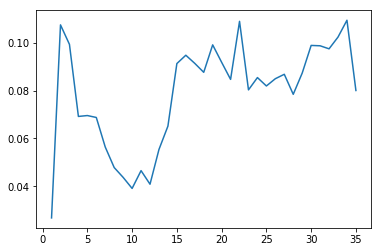

In [38]:
plt.plot(ts_clue_df['season'], ts_clue_df['% TS'])


In [39]:


TS_df = clues_w_date_df[clues_w_date_df["answerer"] == 'Triple Stumper']

TS_j_df = TS_df[TS_df["round"] == "jeopardy_round"]
TS_j_df = TS_j_df.groupby("season").count().reset_index()[["season","answerer"]].rename(columns = {"answerer": "# TS Jeop Clues"})


TS_dj_df = TS_df[TS_df["round"] == "double_jeopardy_round"]
TS_dj_df = TS_dj_df.groupby("season").count().reset_index()[["season","answerer"]].rename(columns = {"answerer": "# TS DJ"})


tot_j_df = clues_w_date_df[clues_w_date_df["round"] == "jeopardy_round"]
tot_j_df = tot_j_df.groupby("season").count().reset_index()[["season","answerer"]].rename(columns = {"answerer": "# Jeop Clues"})
tot_j_df

tot_dj_df = clues_w_date_df[clues_w_date_df["round"] == "double_jeopardy_round"]
tot_dj_df = tot_dj_df.groupby("season").count().reset_index()[["season","answerer"]].rename(columns = {"answerer": "# Doub Jeop Clues"})
tot_dj_df


ts_jeop = TS_j_df.merge(tot_j_df, on = "season")
ts_dj = TS_dj_df.merge(tot_dj_df, on = "season")

ts_jeop["% TS"] = ts_jeop["# TS Jeop Clues"] / ts_jeop["# Jeop Clues"]
ts_jeop


ts_dj["% DJ TS"] = ts_dj["# TS DJ"] / ts_dj["# Doub Jeop Clues"]
ts_dj

ts_jeop = ts_jeop.merge(ts_dj, on = 'season')
ts_jeop = ts_jeop[ts_jeop['season'] != 'super_jeopardy']

#ts_dj['% TS'] = ts_jeop["# TS DJ"] / ts_jeop["# Doub Jeop Clues"]





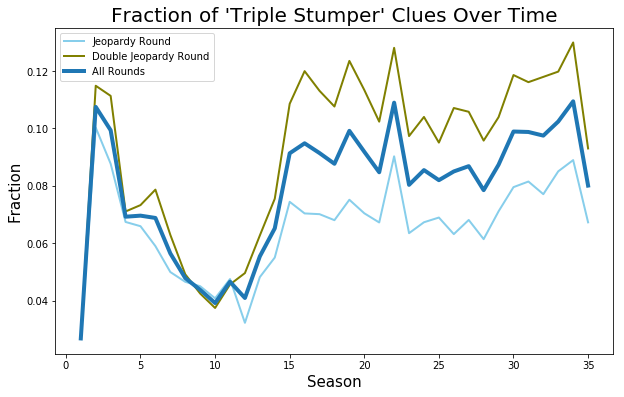

In [63]:
plt.figure(figsize = [10, 6])
plt.plot(ts_jeop['season'], ts_jeop['% TS'], marker='', markerfacecolor='blue', color='skyblue', linewidth=2)
plt.plot(ts_jeop['season'], ts_jeop['% DJ TS'], marker='', color='olive', linewidth=2)
#plt.plot('seasons', 'y3', data=df, marker='', color='olive', linewidth=2, linestyle='dashed', label="toto")


plt.plot(ts_clue_df['season'], ts_clue_df['% TS'], linewidth = 4)

plt.title("Fraction of 'Triple Stumper' Clues Over Time", fontsize = 20)
plt.ylabel("Fraction", fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("Season", fontsize = 15)
plt.legend(["Jeopardy Round","Double Jeopardy Round", "All Rounds" ])

In [22]:
clues_df

,answerer,category,clue_answer,clue_id,clue_text,clue_value,round,show_id,int_values,is_daily_double
0,J.D.,THE OLD TESTAMENT,sheep,clue_J_1_1_stuck,"Let's all flock to read Psalm 95, in which hum...",$200,jeopardy_round,Show #4596,200.0,False
1,J.D.,SEAN SONG,Sean Combs,clue_J_2_1_stuck,"The rap on him is he's sometimes ""Puffy""",$200,jeopardy_round,Show #4596,200.0,False
2,J.D.,CITY WALK,Los Angeles,clue_J_3_1_stuck,In the 1980s this city passed Chicago as the U...,$200,jeopardy_round,Show #4596,200.0,False
3,Ken,SLOGANEERING,Chicken of the Sea,clue_J_4_1_stuck,"""Ask any mermaid you happen to see, 'What's th...",$200,jeopardy_round,Show #4596,200.0,False
4,Ken,ROOM,magazines,clue_J_5_1_stuck,"Many people have become familiar with ""Shape"",...",$200,jeopardy_round,Show #4596,200.0,False
5,Ken,"""BOARD""",the Disney Board of Directors,clue_J_6_1_stuck,"In 2003, Roy E. Disney left it after being on ...",$200,jeopardy_round,Show #4596,200.0,False
6,Ken,THE OLD TESTAMENT,Adam,clue_J_1_2_stuck,Some say the screech owl in the King James Bib...,$400,jeopardy_round,Show #4596,400.0,False
7,Ken,SEAN SONG,Sean Penn,clue_J_2_2_stuck,Once married to Madonna,$400,jeopardy_round,Show #4596,400.0,False
8,Ken,CITY WALK,Greenwich,clue_J_3_2_stuck,"This London borough is the G in GMT, squire",$400,jeopardy_round,Show #4596,400.0,False
9,Ken,SLOGANEERING,Carl\'s Jr.,clue_J_4_2_stuck,"A fast food chain: ""If it doesn't get all over...",$400,jeopardy_round,Show #4596,400.0,False


In [23]:
### n

#clues_df.loc[clues_df['answerer'] == "Triple Stumper"].groupby("show_id").count()

#df = clues_df.rename(columns={'': 'newName1', 'oldName2': 'newName2'})




In [69]:
clues_df

,answerer,category,clue_answer,clue_id,clue_text,clue_value,round,show_id
0,J.D.,THE OLD TESTAMENT,sheep,clue_J_1_1_stuck,"Let's all flock to read Psalm 95, in which hum...",$200,jeopardy_round,Show #4596
1,J.D.,SEAN SONG,Sean Combs,clue_J_2_1_stuck,"The rap on him is he's sometimes ""Puffy""",$200,jeopardy_round,Show #4596
2,J.D.,CITY WALK,Los Angeles,clue_J_3_1_stuck,In the 1980s this city passed Chicago as the U...,$200,jeopardy_round,Show #4596
3,Ken,SLOGANEERING,Chicken of the Sea,clue_J_4_1_stuck,"""Ask any mermaid you happen to see, 'What's th...",$200,jeopardy_round,Show #4596
4,Ken,ROOM,magazines,clue_J_5_1_stuck,"Many people have become familiar with ""Shape"",...",$200,jeopardy_round,Show #4596
5,Ken,"""BOARD""",the Disney Board of Directors,clue_J_6_1_stuck,"In 2003, Roy E. Disney left it after being on ...",$200,jeopardy_round,Show #4596
6,Ken,THE OLD TESTAMENT,Adam,clue_J_1_2_stuck,Some say the screech owl in the King James Bib...,$400,jeopardy_round,Show #4596
7,Ken,SEAN SONG,Sean Penn,clue_J_2_2_stuck,Once married to Madonna,$400,jeopardy_round,Show #4596
8,Ken,CITY WALK,Greenwich,clue_J_3_2_stuck,"This London borough is the G in GMT, squire",$400,jeopardy_round,Show #4596
9,Ken,SLOGANEERING,Carl\'s Jr.,clue_J_4_2_stuck,"A fast food chain: ""If it doesn't get all over...",$400,jeopardy_round,Show #4596


In [72]:


def get_index0(lst):
    return lst[0]
def get_index1(lst):
    return lst[1]
def get_index2(lst):
    return  lst[2]

games_df_copy = games_df

#TS_df = clues_w_date_df[clues_w_date_df["answerer"] == 'Triple Stumper']

games_df_no_sj = games_df_copy[games_df_copy["season"] != "super_jeopardy"]

games_df_no_sj['season'].nunique()

games_df_no_sj["player1"] = games_df_no_sj["Players"].map(get_index0)

games_df_no_sj["player2"] = games_df_no_sj["Players"].map(get_index1)
games_df_no_sj["player3"] = games_df_no_sj["Players"].map(get_index2)

player1_df = games_df_no_sj[["player1", "datetime"]].rename(columns = {"player1":"player"})
player2_df = games_df_no_sj[["player2", "datetime"]].rename(columns = {"player2":"player"})
player3_df = games_df_no_sj[["player3", "datetime"]].rename(columns = {"player3":"player"})

player1_df



/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/carolinevanacore/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,player,datetime
0,J.D. Smith,2004-09-06
1,Rich Hartz,2004-09-07
2,Laura Gustafson,2004-09-08
3,Todd Perkins,2004-09-09
4,Bill Scheller,2004-09-10
5,Bruce England,2004-09-13
6,Robert Quinn,2004-09-14
7,David Fishbach,2004-09-15
8,Elaine Skopelja,2004-09-16
9,Greg Taylor,2004-09-17


In [74]:
streak_df = pd.concat([player1_df, player2_df, player3_df]).groupby("player").count()
streak_df = streak_df.sort_values(by=['datetime'], ascending = False)

streak_df.describe() 




# fig1, ax1 = plt.subplots()

# ax1.boxplot(np.array(streak_df['datetime']))



,datetime
count,11629.000000
mean,1.584745
std,1.616684
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,84.000000


Text(0, 0.5, '# of Contestants')

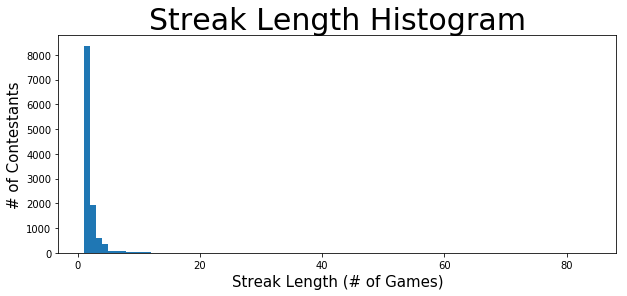

In [88]:
streak_df2 = streak_df.reset_index()


#streak_df2

#plt.hist(streak_df2["player"][, streak_df2['datetime'])

plt.figure(figsize = (10,4))
plt.hist(streak_df2['datetime'], bins = 83)

plt.title("Streak Length Histogram", fontsize = 30)
plt.xlabel("Streak Length (# of Games)", fontsize = 15)
plt.ylabel("# of Contestants", fontsize = 15)

In [76]:
streak_df2.describe()

,datetime
count,11629.000000
mean,1.584745
std,1.616684
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,84.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 <a list of 20 Text xticklabel objects>)

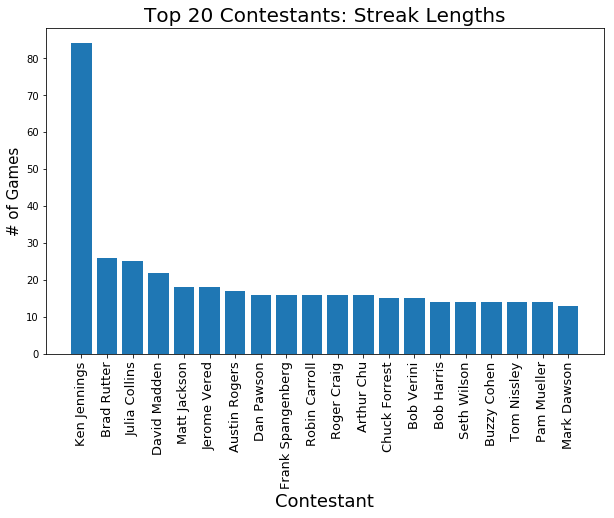

In [101]:
plt.figure(figsize = [10,6])
plt.bar(streak_df2['player'][:20], streak_df2['datetime'][:20])


plt.title("Top 20 Contestants: Streak Lengths", fontsize = 20)
plt.ylabel("# of Games", fontsize = 15)
plt.xlabel("Contestant", fontsize = 18)
plt.xticks(rotation = 90, fontsize = 13)


In [303]:
games_df

,Date,Players,Results,Show_IDs,datetime,season,player1,player2,player3
0,"Monday, September 6, 2004","[J.D. Smith, Betsey Casman, Ken Jennings]","{'Ken': ['$4,800', '$13,800', '$31,600', '$10,...",Show #4596,2004-09-06,21,J.D. Smith,Betsey Casman,Ken Jennings
1,"Tuesday, September 7, 2004","[Rich Hartz, Bob Watts, Ken Jennings]",None,Show #4597,2004-09-07,21,Rich Hartz,Bob Watts,Ken Jennings
2,"Wednesday, September 8, 2004","[Laura Gustafson, Adam Meyer, Ken Jennings]","{'Ken': ['$7,200', '$16,400', '$33,600', '$27,...",Show #4598,2004-09-08,21,Laura Gustafson,Adam Meyer,Ken Jennings
3,"Thursday, September 9, 2004","[Todd Perkins, Amy Helmes, Ken Jennings]","{'Ken': ['$4,800', '$8,100', '$28,400', '$21,8...",Show #4599,2004-09-09,21,Todd Perkins,Amy Helmes,Ken Jennings
4,"Friday, September 10, 2004","[Bill Scheller, Kollin Min, Ken Jennings]","{'Ken': ['$5,800', '$13,600', '$28,600', '$30,...",Show #4600,2004-09-10,21,Bill Scheller,Kollin Min,Ken Jennings
5,"Monday, September 13, 2004","[Bruce England, Dana Dolan, Ken Jennings]",None,Show #4601,2004-09-13,21,Bruce England,Dana Dolan,Ken Jennings
6,"Tuesday, September 14, 2004","[Robert Quinn, Kate Duffy, Ken Jennings]","{'Ken': ['$5,000', '$11,200', '$31,000', '$40,...",Show #4602,2004-09-14,21,Robert Quinn,Kate Duffy,Ken Jennings
7,"Wednesday, September 15, 2004","[David Fishbach, Cara Butler, Ken Jennings]","{'Ken': ['$6,000', '$11,400', '$43,800', '$37,...",Show #4603,2004-09-15,21,David Fishbach,Cara Butler,Ken Jennings
8,"Thursday, September 16, 2004","[Elaine Skopelja, John Cook, Ken Jennings]",None,Show #4604,2004-09-16,21,Elaine Skopelja,John Cook,Ken Jennings
9,"Friday, September 17, 2004","[Greg Taylor, Marilyn Werner, Ken Jennings]",None,Show #4605,2004-09-17,21,Greg Taylor,Marilyn Werner,Ken Jennings


In [70]:


def strng_to_value2(strng):

    return(int(re.sub( '[,$ ]', '', f'{strng}')))


def interpret_results(score_dict):
    if score_dict != None:
        scores = []
        for key in score_dict:
            
            after_j = score_dict[key][1]  
            final = score_dict[key][3]
            
            
            scores.append([strng_to_value2(after_j), strng_to_value2(final)])

            #after_dj = lst[2]
            #coryat = lst[4]
            
            #scores.append([strng_to_value2(after_j), strng_to_value2(final)])
        score_array = np.array(scores)
        
        if score_array.argmax(axis=0)[0] == score_array.argmax(axis=0)[1]:
            return True
        else:
            return False
        
        



In [107]:
import re

In [108]:
test_results = games_df["Results"][14]
test_results
interpret_results(test_results)


False

In [109]:
games_df_1 = games_df

In [110]:
games_df_1['after_j_predict'] = games_df_1["Results"].map(interpret_results)

In [111]:
games_df_1

,Date,Players,Results,Show_IDs,datetime,season,after_j_predict
0,"Monday, September 6, 2004","[J.D. Smith, Betsey Casman, Ken Jennings]","{'Ken': ['$4,800', '$13,800', '$31,600', '$10,...",Show #4596,2004-09-06,21,True
1,"Tuesday, September 7, 2004","[Rich Hartz, Bob Watts, Ken Jennings]",None,Show #4597,2004-09-07,21,None
2,"Wednesday, September 8, 2004","[Laura Gustafson, Adam Meyer, Ken Jennings]","{'Ken': ['$7,200', '$16,400', '$33,600', '$27,...",Show #4598,2004-09-08,21,True
3,"Thursday, September 9, 2004","[Todd Perkins, Amy Helmes, Ken Jennings]","{'Ken': ['$4,800', '$8,100', '$28,400', '$21,8...",Show #4599,2004-09-09,21,True
4,"Friday, September 10, 2004","[Bill Scheller, Kollin Min, Ken Jennings]","{'Ken': ['$5,800', '$13,600', '$28,600', '$30,...",Show #4600,2004-09-10,21,True
5,"Monday, September 13, 2004","[Bruce England, Dana Dolan, Ken Jennings]",None,Show #4601,2004-09-13,21,None
6,"Tuesday, September 14, 2004","[Robert Quinn, Kate Duffy, Ken Jennings]","{'Ken': ['$5,000', '$11,200', '$31,000', '$40,...",Show #4602,2004-09-14,21,True
7,"Wednesday, September 15, 2004","[David Fishbach, Cara Butler, Ken Jennings]","{'Ken': ['$6,000', '$11,400', '$43,800', '$37,...",Show #4603,2004-09-15,21,True
8,"Thursday, September 16, 2004","[Elaine Skopelja, John Cook, Ken Jennings]",None,Show #4604,2004-09-16,21,None
9,"Friday, September 17, 2004","[Greg Taylor, Marilyn Werner, Ken Jennings]",None,Show #4605,2004-09-17,21,None


In [114]:
false_j_predict = games_df[games_df_1['after_j_predict'] == False]
false_j_predict

,Date,Players,Results,Show_IDs,datetime,season,after_j_predict
14,"Friday, September 24, 2004","[Jim Stalley, Anne Boyd, Sean Ryan]","{'Sean': ['$3,600', '$4,000', '$5,200', '$2,60...",Show #4610,2004-09-24,21,False
16,"Tuesday, September 28, 2004","[Chris Miller, Anne Boyd, Tom Walsh]","{'Tom': ['$0', '$3,400', '$11,800', '$14,701',...",Show #4612,2004-09-28,21,False
18,"Thursday, September 30, 2004","[Russ Schumacher, Tom Walsh, Arthur Gandolfi]","{'Arthur': ['$1,800', '$5,200', '$7,200', '$0'...",Show #4614,2004-09-30,21,False
44,"Saturday, November 6, 2004","[Leo Wolpert, Ryan Cook, Ken Jennings]","{'Ken': ['$5,000', '$5,000', '$27,600', '$33,2...",Show #4640,2004-11-06,21,False
46,"Tuesday, November 9, 2004","[Dave Oosterhuis, Jeff Hoppes, Ken Jennings]","{'Ken': ['$3,000', '$3,200', '$26,800', '$30,0...",Show #4642,2004-11-09,21,False
48,"Thursday, November 11, 2004","[Vicky Manos, Jeff Love, Amanda Nowotny]","{'Amanda': ['$800', '$2,000', '$5,800', '$0', ...",Show #4644,2004-11-11,21,False
52,"Wednesday, November 17, 2004","[Vicky Manos, Ari Schoenholtz, Casey Retterer]","{'Casey': ['$8,000', '$9,200', '$10,800', '$15...",Show #4648,2004-11-17,21,False
65,"Monday, December 6, 2004","[Andy Zimdars, Dennis Grace, Pete DeBalli]","{'Pete': ['$2,200', '$5,800', '$9,000', '$100'...",Show #4661,2004-12-06,21,False
67,"Wednesday, December 8, 2004","[Megan Susman, Alex Bready, Jackie Cipa]","{'Jackie': ['$800', '$3,000', '$1,400', '$0', ...",Show #4663,2004-12-08,21,False
69,"Friday, December 10, 2004","[Colette Moran, Robert Bowsher, Tom McCudden]","{'Tom': ['$9,000', '$12,200', '$12,800', '$2,8...",Show #4665,2004-12-10,21,False


In [115]:
true_j_predict = games_df[games_df_1['after_j_predict'] == True]
true_j_predict

,Date,Players,Results,Show_IDs,datetime,season,after_j_predict
0,"Monday, September 6, 2004","[J.D. Smith, Betsey Casman, Ken Jennings]","{'Ken': ['$4,800', '$13,800', '$31,600', '$10,...",Show #4596,2004-09-06,21,True
2,"Wednesday, September 8, 2004","[Laura Gustafson, Adam Meyer, Ken Jennings]","{'Ken': ['$7,200', '$16,400', '$33,600', '$27,...",Show #4598,2004-09-08,21,True
3,"Thursday, September 9, 2004","[Todd Perkins, Amy Helmes, Ken Jennings]","{'Ken': ['$4,800', '$8,100', '$28,400', '$21,8...",Show #4599,2004-09-09,21,True
4,"Friday, September 10, 2004","[Bill Scheller, Kollin Min, Ken Jennings]","{'Ken': ['$5,800', '$13,600', '$28,600', '$30,...",Show #4600,2004-09-10,21,True
6,"Tuesday, September 14, 2004","[Robert Quinn, Kate Duffy, Ken Jennings]","{'Ken': ['$5,000', '$11,200', '$31,000', '$40,...",Show #4602,2004-09-14,21,True
7,"Wednesday, September 15, 2004","[David Fishbach, Cara Butler, Ken Jennings]","{'Ken': ['$6,000', '$11,400', '$43,800', '$37,...",Show #4603,2004-09-15,21,True
10,"Monday, September 20, 2004","[Keith Williams, Sam Ott, Arthur Gandolfi]","{'Arthur': ['$2,000', '$5,400', '$16,200', '$1...",Show #4606,2004-09-20,21,True
11,"Tuesday, September 21, 2004","[Steve Reynolds, Seth Alcorn, Tom Walsh]","{'Tom': ['$2,600', '$4,000', '$11,600', '$12,4...",Show #4607,2004-09-21,21,True
12,"Wednesday, September 22, 2004","[Vinita Kailasanath, Scott Renzoni, John Beck]","{'John': ['$2,800', '$2,400', '$5,600', '$599'...",Show #4608,2004-09-22,21,True
13,"Thursday, September 23, 2004","[Russ Schumacher, Tom Baker, Chris Miller]","{'Chris': ['$2,000', '$2,000', '$2,000', '$4,0...",Show #4609,2004-09-23,21,True


,Date,Players,Results,Show_IDs,datetime,after_j_predict
season,,,,,,
1,10,10,10,10,10,10
2,15,15,15,15,15,15
3,37,37,37,37,37,37
4,48,48,48,48,48,48
5,43,43,43,43,43,43
6,70,70,70,70,70,70
7,22,22,22,22,22,22
8,30,30,30,30,30,30
9,38,38,38,38,38,38


Text(0, 0.5, 'Fraction of Games')

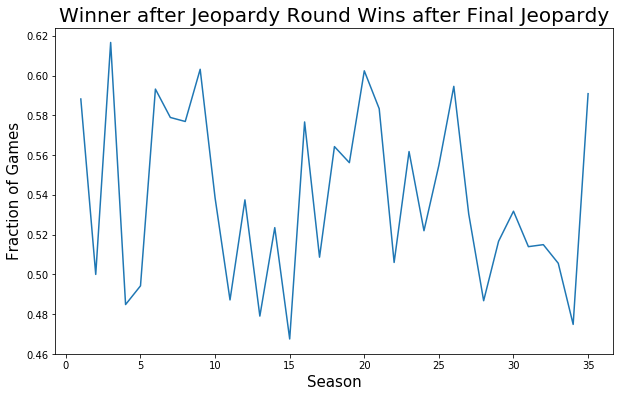

In [123]:
true_j_predict_count = true_j_predict.groupby("season").count().reset_index()
true = pd.DataFrame()
true["season"] = true_j_predict_count["season"]
true["after_j_predict_true"] = true_j_predict_count["after_j_predict"]


#,["after_j_predict"]]

false_j_predict_count = false_j_predict.groupby("season").count().reset_index()
false = pd.DataFrame()
false["season"] = false_j_predict_count["season"]
false["after_j_predict_false"] = false_j_predict_count["after_j_predict"]

combined = true.merge(false, on = 'season')

combined['total'] = combined['after_j_predict_false'] + combined['after_j_predict_true']

combined['% True Predict'] = combined['after_j_predict_true'] / combined['total']

combined

plt.figure(figsize = [10,6])
plt.plot(combined['season'][:-1], combined['% True Predict'][:-1])

plt.title("Winner after Jeopardy Round Wins after Final Jeopardy", fontsize = 20)
plt.xlabel("Season",fontsize = 15)
plt.ylabel("Fraction of Games", fontsize = 15)



In [290]:
test

,season,after_j_predict_true
0,1,10
1,2,15
2,3,37
3,4,48
4,5,43
5,6,70
6,7,22
7,8,30
8,9,38
9,10,21
